# Dimensionality Reduction Examples

In [184]:
import sklearn
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.feature_selection import mutual_info_regression

from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from mpl_toolkits import mplot3d
from sklearn.manifold import MDS
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding

from matplotlib import offsetbox

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

# Statistical Techniques for Feature Selection

## Breast Cancer Dataset

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)



In [3]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
cancer_df.shape

(569, 30)

In [5]:
cancer_df['class'] = cancer.target
cancer_df['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

In [6]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Text(0, 0.5, 'mean texture')

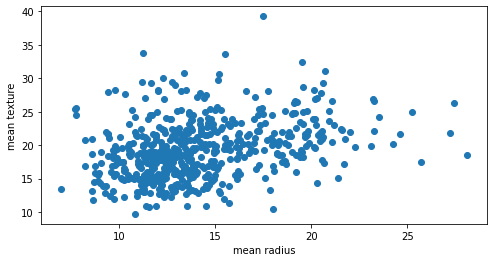

In [7]:
fig, ax = plt.subplots(figsize = (8,4))
plt.scatter(cancer_df['mean radius'], cancer_df['mean texture'])
plt.xlabel('mean radius')
plt.ylabel('mean texture')

Text(0, 0.5, 'mean smoothness')

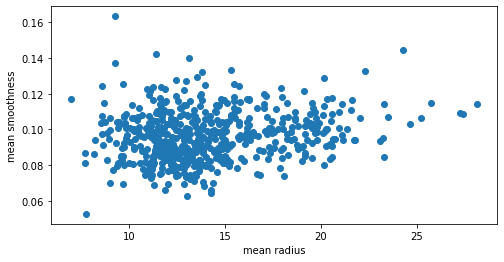

In [8]:
fig, ax = plt.subplots(figsize = (8,4))

plt.scatter(cancer_df['mean radius'], cancer_df['mean smoothness'])

plt.xlabel('mean radius')
plt.ylabel('mean smoothness')

Text(0, 0.5, 'mean symmetry')

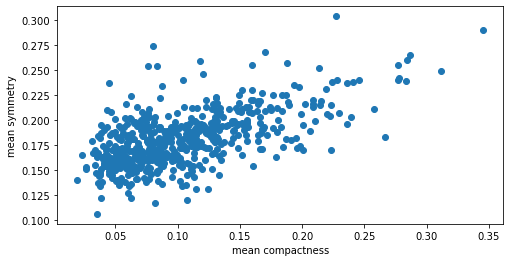

In [9]:
fig, ax = plt.subplots(figsize = (8,4))

plt.scatter(cancer_df['mean compactness'], cancer_df['mean symmetry'])

plt.xlabel('mean compactness')
plt.ylabel('mean symmetry')

In [10]:
cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'class'],
      dtype='object')

In [11]:
cancer_df_subset = cancer_df[['mean radius', 
                              'mean texture', 
                              'mean perimeter', 
                              'mean area',
                              'mean smoothness',
                              'mean compactness',
                              'mean concavity',
                              'mean concave points',
                              'mean symmetry',
                             'mean fractal dimension',
                             'class']]

In [12]:
cancer_corr = cancer_df_subset.corr()
cancer_corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,class
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.012838


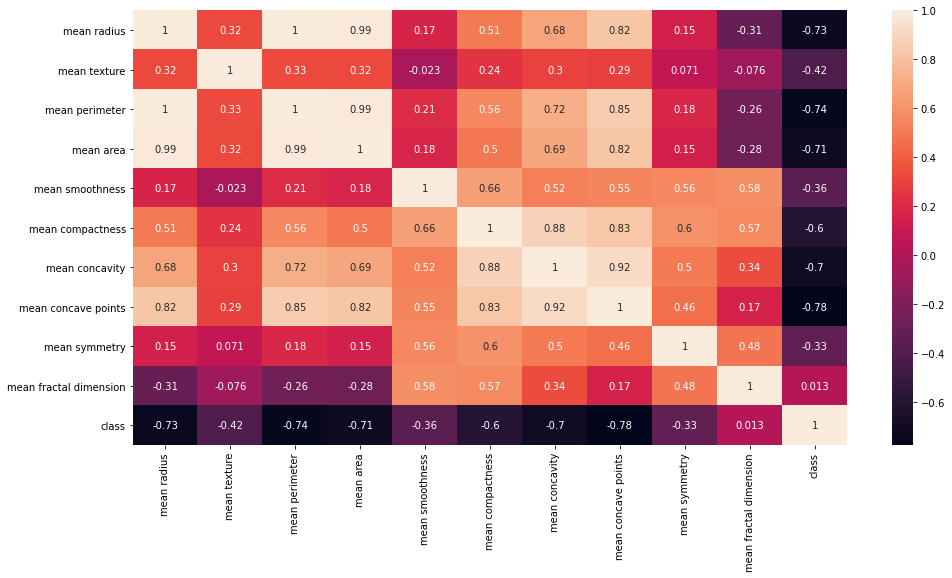

In [13]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.heatmap(cancer_corr, annot = True)

Many of the features are highly correlated with each other

In [14]:
X = cancer_df.drop('class', axis = 1)
Y = cancer_df['class']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [15]:
classifier = LogisticRegression(solver='liblinear')
classifier.fit(x_train, y_train) 
y_pred = classifier.predict(x_test)
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})
pred_results.head()

,y_test,y_pred
515,1,1
402,1,1
372,0,0
478,1,1
305,1,1


In [16]:
cancer_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
cancer_crosstab

y_test,0,1
y_pred,,
0,42,1
1,1,70


In [17]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.9824561403508771
precision_score :  0.9859154929577465
recall_score :  0.9859154929577465


## Housing Price Dataset (Kaggle)

In [18]:
housesale_df = pd.read_csv('datasets/kc_house_data.csv')
housesale_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
housesale_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
housesale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [21]:
housesale_df = housesale_df.drop({'id', 'date', 'zipcode'}, axis = 1)

In [22]:
# Get the age of property from the year built and current year then drop the year built column
housesale_df['age'] = 2021 - housesale_df['yr_built']
housesale_df = housesale_df.drop('yr_built', axis = 1)

In [23]:
# Create a binary renovation column to indicate whether a house was renovated or not and drop the year renovated column
housesale_df['renovated'] = housesale_df['yr_renovated'].apply(lambda x:1 if x > 0 else 0)
housesale_df = housesale_df.drop('yr_renovated', axis = 1)

In [24]:
housesale_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age,renovated
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,47.560093,-122.213982,1986.620318,12758.283512,50.000324,0.042321
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,0.138552,0.140724,685.230472,27274.441950,29.375234,0.201324
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,6.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,24.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,46.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,47.678000,-122.125000,2360.000000,10083.000000,70.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000,121.000000,1.000000


In [25]:
housesale_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age',
       'renovated'],
      dtype='object')

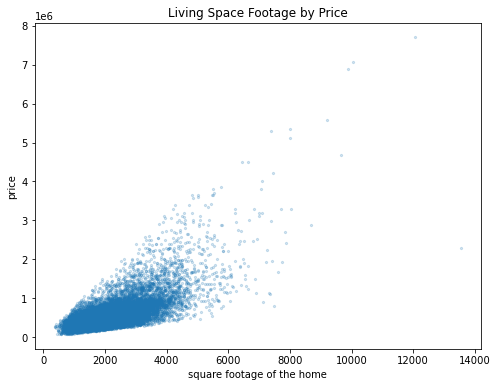

In [26]:
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(housesale_df['sqft_living'], housesale_df['price'], s = 5, alpha = 0.2)
plt.xlabel('square footage of the home')
plt.title("Living Space Footage by Price")
ax = plt.ylabel('price')

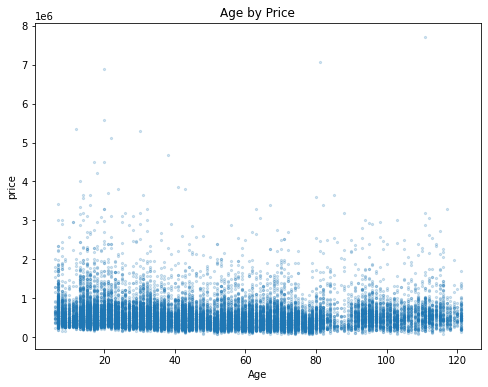

In [27]:
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(housesale_df['age'], housesale_df['price'], s = 5, alpha = 0.2)
plt.xlabel('Age')
plt.title("Age by Price")
ax = plt.ylabel('price')

Text(0, 0.5, 'price')

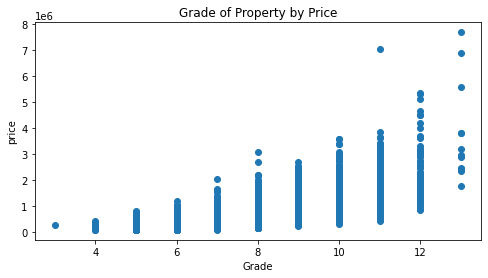

In [28]:
fig, ax = plt.subplots(figsize = (8,4))
plt.scatter(housesale_df['grade'], housesale_df['price'])
plt.title("Grade of Property by Price")
plt.xlabel('Grade')
plt.ylabel('price')

In [29]:
housesale_corr = housesale_df.corr()
housesale_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age,renovated
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.306692,0.022036,0.585241,0.082845,-0.053953,0.126082
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,-0.009951,0.132054,0.393406,0.030690,-0.155670,0.018100
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.024280,0.224903,0.569884,0.088303,-0.507173,0.050064
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.052155,0.241214,0.756402,0.184342,-0.318152,0.055039
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,-0.085514,0.230227,0.144763,0.718204,-0.052946,0.007788
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.049239,0.125943,0.280102,-0.010722,-0.489193,0.006348
waterfront,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.014306,-0.041904,0.086507,0.030781,0.026153,0.093282
view,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,0.005871,-0.078107,0.280681,0.072904,0.053636,0.104095
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.015102,-0.105877,-0.093072,-0.003126,0.361592,-0.060309
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.113575,0.200341,0.713867,0.120981,-0.447865,0.013854


<AxesSubplot:>

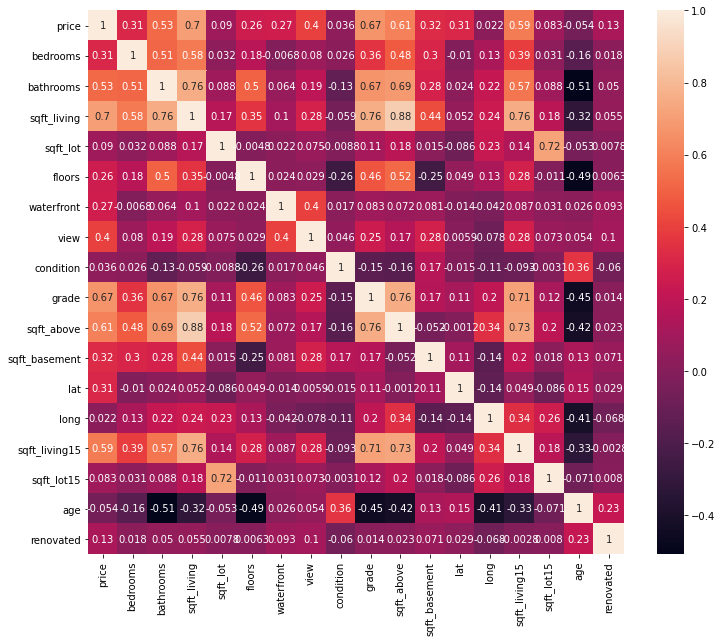

In [30]:
fig, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(housesale_corr, annot=True)

In [31]:
X = housesale_df.drop('price', axis=1)
Y = housesale_df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [32]:
reg_model = LinearRegression().fit(x_train, y_train)
print('Training score: ', reg_model.score(x_train, y_train))

Training score:  0.6951207824118794


In [33]:
predictors = x_train.columns
coef = pd.Series(reg_model.coef_, predictors).sort_values()
print(coef)

long            -122766.181719
bedrooms         -32412.874140
sqft_lot15           -0.309006
sqft_lot              0.122204
sqft_living15        31.075070
sqft_basement        38.256441
sqft_above           67.510349
sqft_living         105.766790
age                2393.098467
floors             2413.559417
condition         30573.836804
bathrooms         38435.803904
view              47976.102514
renovated         54602.331832
grade             99243.831932
lat              560682.174026
waterfront       615173.110518
dtype: float64


In [34]:
y_pred = reg_model.predict(x_test)
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.6974131784140789


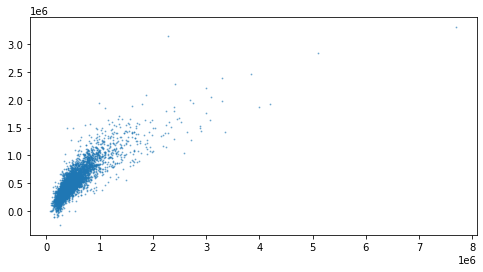

In [35]:
plt.figure(figsize = (8,4))
plt.scatter(y_test.values, y_pred, s = 0.75, alpha = 0.5)
plt.show()

### Statsmodels Regression with all Variables Included

In [36]:
x_train_with_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_with_const)

In [37]:
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     2460.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:31:17   Log-Likelihood:            -2.3551e+05
No. Observations:               17277   AIC:                         4.711e+05
Df Residuals:                   17260   BIC:                         4.712e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.252e+07   1.72e+06    -24.788

In [38]:
x_test_with_const = sm.add_constant(x_test)
y_pred = result.predict(x_test_with_const)

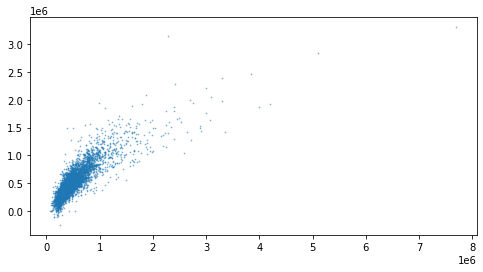

In [39]:
plt.figure(figsize = (8,4))
plt.scatter(y_test.values, y_pred, s = 0.5, alpha = 0.5)
plt.show()

### Feature Selection

In [40]:
# Convert all the columns to type float
housesale_df = housesale_df.astype("float")
X = housesale_df.drop('price', axis = 1)
y = housesale_df['price']

In [41]:
# Select the best features from the F-regression. Show the three most significant features
select_features = SelectKBest(f_regression, k = 3)
X_new = select_features.fit_transform(X, Y)
X_new.shape

(21597, 3)

In [42]:
X_new = pd.DataFrame(X_new)
X_new.head()

,0,1,2
0,1180.0,7.0,1180.0
1,2570.0,7.0,2170.0
2,770.0,6.0,770.0
3,1960.0,7.0,1050.0
4,1680.0,8.0,1680.0


In [43]:
# Get the feature names for the selected features
selected_features = []

for i in range(len(X_new.columns)):
    for j in range(len(X.columns)):
        if(X_new.iloc[:,i].equals( X.iloc[:,j])):
            selected_features.append(X.columns[j])
            
selected_features

['sqft_living', 'grade', 'sqft_above']

In [44]:
# What features are rejected?
rejected_features = set(list(X)) - set(selected_features)
print(rejected_features)

{'sqft_lot15', 'long', 'waterfront', 'age', 'sqft_lot', 'bedrooms', 'sqft_basement', 'sqft_living15', 'view', 'renovated', 'condition', 'bathrooms', 'floors', 'lat'}


In [45]:
# NOTE that usually we add a constant but for this example there is no bias so this model might not do as well with test data
# as the bias acts as a form of regularization.
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2)
model = sm.OLS(y_train, x_train)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.838
Model:                            OLS   Adj. R-squared (uncentered):              0.838
Method:                 Least Squares   F-statistic:                          2.989e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):                        0.00
Time:                        14:31:17   Log-Likelihood:                     -2.4012e+05
No. Observations:               17277   AIC:                                  4.802e+05
Df Residuals:                   17274   BIC:                                  4.803e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

the low p-value and high F-statistic show that the selection of features is significant. 

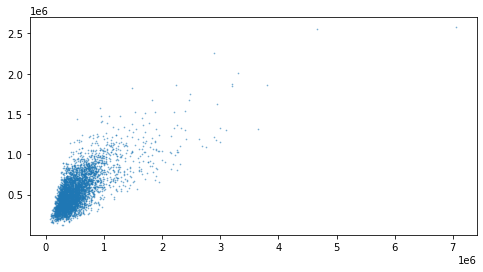

In [46]:
y_pred = result.predict(x_test)
plt.figure(figsize = (8,4))
plt.scatter(y_test.values, y_pred, s = 0.5, alpha = 0.5)
plt.show()

## Hyperparameter Tuning

In [47]:
features = list(housesale_df.columns[1:18])
print(features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age', 'renovated']


In [48]:
# Function to test different linear regression models with different features
def build_model(regression_fn,                
                target, 
                features, 
                dataset,
                preprocess_fn,
                *hyperparameters):
    
    X = dataset[features]
    Y = dataset[target]

    X = preprocess_fn(X, Y, *hyperparameters)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    return {
            'x_train' : x_train,
            'x_test'  : x_test, 
            'y_train' : y_train,
            'y_test'  : y_test,
            'y_pred'  : y_pred,
            'model'   : model
           }     

In [49]:
# define the ols model
def ols_reg(x_train, y_train):
    
    ols = sm.OLS(y_train, x_train)
    
    model = ols.fit()
    
    return model

In [50]:
# Function to return model scores as a dictionary (r and r-squared)
def get_model_scores(model_params):
    
    result_dict = {}

    for key in model_params:
        result_dict[key] = {
                            'rsquared' : model_params[key]['model'].rsquared,
                            'adj_rsquared': model_params[key]['model'].rsquared_adj
                           }
        
    compare_results(result_dict)

In [51]:
# Compare the results and plot them
def compare_results(result_dict):
    
    for key in result_dict:
        print('Test : ', key)
        print('R-Squared', result_dict[key]['rsquared'])
        print('Adjusted R-Squared', result_dict[key]['adj_rsquared'])
        print()
        
    n_components = list(range(1, 18))
    reg_score = [result_dict[key]['adj_rsquared'] for key in result_dict]

    plt.figure(figsize = (8,4))
    plt.plot(n_components, reg_score)

    plt.ylim([0,1])
    
    plt.xlabel('n components')
    plt.ylabel('adj_rsquared');

In [52]:
# Function to get the k best features, add a constant and return a dataframe
def apply_f_regression(x, y, k, add_constant = False):
    
    select_features = SelectKBest(f_regression, k = k)
    x_new = select_features.fit_transform(x, y)
    
    if add_constant is True:
        x_new = sm.add_constant(x_new)
        
    return pd.DataFrame(x_new)

In [53]:
# Get the model parameters after running the build_model function
model_params = {}

for i in range (1, 18):
    model_params['f_regression - k:' + str(i)] = build_model(ols_reg,
                                                             'price',
                                                              features,
                                                              housesale_df,
                                                              apply_f_regression,
                                                              i,
                                                              True)

Test :  f_regression - k:1
R-Squared 0.49397582632273185
Adjusted R-Squared 0.49394653404060873

Test :  f_regression - k:2
R-Squared 0.5302352091838259
Adjusted R-Squared 0.5301808193736122

Test :  f_regression - k:3
R-Squared 0.5466840303971847
Adjusted R-Squared 0.5466052978140312

Test :  f_regression - k:4
R-Squared 0.5389152550538655
Adjusted R-Squared 0.5388084730378984

Test :  f_regression - k:5
R-Squared 0.5483213282613635
Adjusted R-Squared 0.5481905660959594

Test :  f_regression - k:6
R-Squared 0.5757086346908933
Adjusted R-Squared 0.5755612259942022

Test :  f_regression - k:7
R-Squared 0.5749810144871852
Adjusted R-Squared 0.5748333529982983

Test :  f_regression - k:8
R-Squared 0.5791477325624417
Adjusted R-Squared 0.5789771398314172

Test :  f_regression - k:9
R-Squared 0.6386927126711154
Adjusted R-Squared 0.6385253245370737

Test :  f_regression - k:10
R-Squared 0.6569921613841425
Adjusted R-Squared 0.6568133769660304

Test :  f_regression - k:11
R-Squared 0.6617983

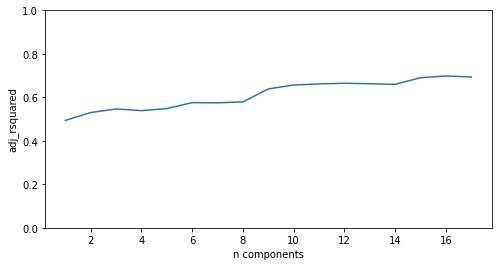

In [54]:
# Run the scores
get_model_scores(model_params)

## Machine Learning Model

In [55]:
# Function to run a linear regression model
def linear_reg(x_train, y_train):
    
    model = LinearRegression().fit(x_train, y_train)
    
    return model

In [56]:
# use the 9 best features as found above
sklearn_model = {}
sklearn_model['f_regression'] = build_model(linear_reg,
                                          'price',
                                           features,
                                           housesale_df,
                                           apply_f_regression,
                                           9)

In [57]:
model   = sklearn_model['f_regression']['model']
x_train = sklearn_model['f_regression']['x_train']
x_test  = sklearn_model['f_regression']['x_test']
y_train = sklearn_model['f_regression']['y_train']
y_test  = sklearn_model['f_regression']['y_test']
y_pred  = sklearn_model['f_regression']['y_pred']

In [58]:
print('Training score: ', model.score(x_train, y_train))
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.6378778978616952
Testing score:  0.6489932470363913


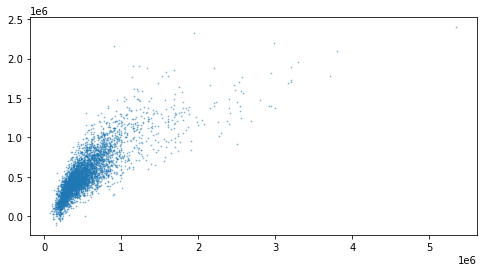

In [59]:
plt.figure(figsize = (8,4))
plt.scatter(y_test.values, y_pred, s = 0.5, alpha = 0.5)
plt.show()

## Mutal Information Regression

### Statsmodels Version

In [60]:
def apply_mutual_info_regression(x, y, k, add_constant = False):
    
    select_features = SelectKBest(mutual_info_regression, k = k)  
    x_new = select_features.fit_transform(x, y)
    
    if add_constant is True:
        x_new = sm.add_constant(x_new)

    return pd.DataFrame(x_new)

In [61]:
model_params = {}

for i in range (1, 18):
    model_params['mutual_info_regression - k:' + str(i)] = build_model(ols_reg,
                                                                      'price',
                                                                       features,
                                                                       housesale_df,
                                                                       apply_mutual_info_regression,
                                                                       i,
                                                                       True)

Test :  mutual_info_regression - k:1
R-Squared 0.49246577276749903
Adjusted R-Squared 0.49243639307272435

Test :  mutual_info_regression - k:2
R-Squared 0.5355394861391276
Adjusted R-Squared 0.5354857104630988

Test :  mutual_info_regression - k:3
R-Squared 0.5947108917260805
Adjusted R-Squared 0.5946405005187151

Test :  mutual_info_regression - k:4
R-Squared 0.6029774176951292
Adjusted R-Squared 0.6028854717520294

Test :  mutual_info_regression - k:5
R-Squared 0.5973342368017998
Adjusted R-Squared 0.5972176640025414

Test :  mutual_info_regression - k:6
R-Squared 0.6017187219972058
Adjusted R-Squared 0.6015803498102912

Test :  mutual_info_regression - k:7
R-Squared 0.6165856545627437
Adjusted R-Squared 0.6164302373169239

Test :  mutual_info_regression - k:8
R-Squared 0.6204400436689831
Adjusted R-Squared 0.6202641993528695

Test :  mutual_info_regression - k:9
R-Squared 0.6218450384975449
Adjusted R-Squared 0.6216479345041748

Test :  mutual_info_regression - k:10
R-Squared 0.619

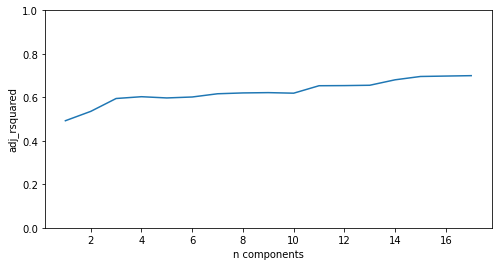

In [62]:
get_model_scores(model_params)

## Machine Learning Model

In [63]:
# Build model using four best features
sklearn_model = {}

sklearn_model['mutual_info_regression'] = build_model(linear_reg,
                                                      'price',
                                                       features,
                                                       housesale_df,
                                                       apply_mutual_info_regression,
                                                       4)

In [64]:
model   = sklearn_model['mutual_info_regression']['model']
x_train = sklearn_model['mutual_info_regression']['x_train']
x_test  = sklearn_model['mutual_info_regression']['x_test']
y_train = sklearn_model['mutual_info_regression']['y_train']
y_test  = sklearn_model['mutual_info_regression']['y_test']
y_pred  = sklearn_model['mutual_info_regression']['y_pred']

In [65]:
print('Training score: ', model.score(x_train, y_train))
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.598759822885093
Testing score:  0.5903944558710819


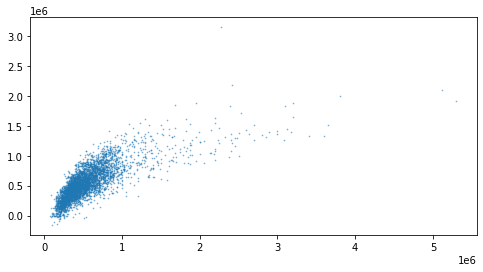

In [66]:
plt.figure(figsize = (8,4))
plt.scatter(y_test.values, y_pred, s = 0.5, alpha = 0.5)
plt.show()

# Linear Data Dimensionality Reduction

## PCA

In [67]:
boston_df = pd.read_csv('datasets/boston.csv')
boston_df.head()

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels,Median Home Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [68]:
boston_df.shape

(506, 13)

In [69]:
# Assign features to a variable X
X = list(boston_df.columns[:-1])
X

['crime rate',
 'residential land zone',
 'business acres',
 'Charles River',
 'nitric oxides',
 'number of rooms',
 'age',
 'distances to employment centres',
 'accessibility to highways',
 'property-tax',
 'pupil-teacher ratio',
 'lower income levels']

In [70]:
# Function to run PCA with specificed number of components and add a constant for use with statsmodels regression
def principal(X, n, add_constant = False):
    pca = PCA(n_components = n)  
    x_new = pca.fit_transform(X)
    
    if add_constant is True:
        x_new = sm.add_constant(x_new)    
        
    return pca, pd.DataFrame(x_new)

In [71]:
# Run the function and print the explained variance and the sum of these results which should be one
pca, df = principal(boston_df[X], len(X))
print("Explained Variance:", pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

Explained Variance: [9.60040728e-01 2.73884414e-02 8.89341069e-03 1.72579506e-03
 9.36295702e-04 5.35816960e-04 3.19581712e-04 1.09868221e-04
 3.93666446e-05 8.58505778e-06 2.00834312e-06 1.02396314e-07]
1.0


The first two principal components account for more than 90% of the total

In [72]:
# These are the transformed values
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-113.002193,-2.867869,5.226224,-2.276214,-6.359762,-1.029248,5.458417,-1.965709,-0.329180,0.376816,-0.072840,0.033906
1,-164.339238,-30.791377,1.261191,0.157293,-3.290283,-0.628297,0.922169,0.466716,1.299851,0.047921,-0.094953,-0.033164
2,-165.994946,-16.847129,-10.284651,-0.242314,-5.906567,1.695048,0.463067,0.388631,0.910989,-0.475788,-0.107795,-0.004313
3,-187.298841,-6.700238,-19.624442,1.450973,-6.958016,-1.997822,0.806526,1.033503,0.964875,-0.287400,-0.054350,0.044358
4,-186.517530,-13.276763,-14.172868,1.661640,-5.785851,-3.074645,1.018676,1.044231,1.123522,-0.545468,-0.055539,0.035648


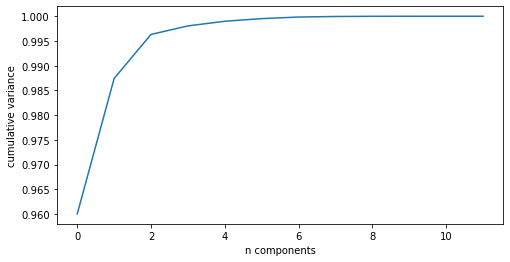

In [73]:
# Plot the cumulative sum of these results to show that the first two components and their contribution
plt.figure(figsize = (8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [74]:
# Statsmodels and ML models for regression - functions

def ols_reg(x_train, y_train):
    ols = sm.OLS(y_train, x_train)
    model = ols.fit()
    return model

def linear_reg(x_train, y_train):
    model = LinearRegression().fit(x_train, y_train)
    return model

In [75]:
# Function to apply PCA then run a model and return results. Specify the model function, the target and features, dataset and the
## number of hyperparameters to use in the PCA.

# NOTE: In a function header (* - collects all the positional arguements in a tuple and ** collects all the keyword arguements 
## into a dictionary)
# In a function call (* unpacks the arguements into a tuple and ** unpacks them into a dictionary)
## Used here as the number of hyperparameters varies according to whether using statsmodels or ML regression (ie a constant is
### required for the former)

def build_model(regression_fn,                
                target, 
                features, 
                dataset,
                *hyperparameters):
    
    X = dataset[features]
    Y = dataset[target]

    _ , X_new = principal(X, *hyperparameters)

    x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
  
    
    return {
            'x_initial' : X,
            'x_transform': X_new,
            'x_train' : x_train,
            'x_test'  : x_test, 
            'y_train' : y_train,
            'y_test'  : y_test,
            'y_pred'  : y_pred,
            'model'   : model
           }     

### Statsmodel

In [76]:
# Set up a dictionary to collect the results and run the regression using statsmodels with constant set to true
model_params = {}
model_params['statsmodel'] = build_model(ols_reg,'Median Home Value',X,boston_df,7,True)

In [77]:
# Get the results from the model
model       = model_params['statsmodel']['model']
x_initial   = model_params['statsmodel']['x_initial']
x_transform = model_params['statsmodel']['x_transform']
x_train     = model_params['statsmodel']['x_train']
x_test      = model_params['statsmodel']['x_test']
y_train     = model_params['statsmodel']['y_train']
y_test      = model_params['statsmodel']['y_test']
y_pred      = model_params['statsmodel']['y_pred']

In [78]:
# Get shape (7 features plus the constant)
x_transform.shape

(506, 8)

In [79]:
x_initial.head()

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33


In [80]:
x_transform.head()

,0,1,2,3,4,5,6,7
0,1.0,-113.002193,-2.867869,5.226224,-2.276214,-6.359762,-1.029248,5.458417
1,1.0,-164.339238,-30.791377,1.261191,0.157293,-3.290283,-0.628297,0.922169
2,1.0,-165.994946,-16.847129,-10.284651,-0.242314,-5.906567,1.695048,0.463067
3,1.0,-187.298841,-6.700238,-19.624442,1.450973,-6.958016,-1.997822,0.806526
4,1.0,-186.517530,-13.276763,-14.172868,1.661640,-5.785851,-3.074645,1.018676


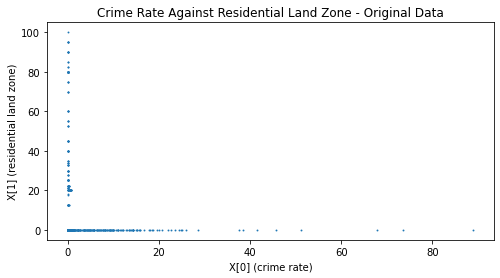

In [81]:
# Visualise the first two features from the initial dataframe
fig, ax = plt.subplots(figsize = (8,4))
ax.scatter(x_initial['crime rate'], x_initial['residential land zone'], cmap = 'Spectral',s = 0.8)
plt.title("Crime Rate Against Residential Land Zone - Original Data")
plt.xlabel('X[0] (crime rate)')
plt.ylabel('X[1] (residential land zone)');

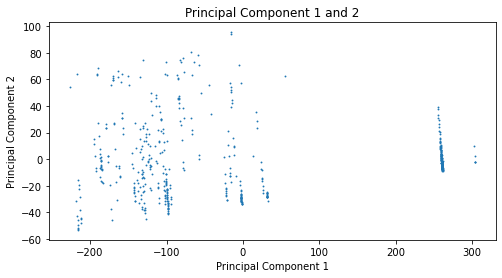

In [82]:
# Compare the first two principal components (ignore the constant at index 0)
fig, ax = plt.subplots(figsize = (8,4))
ax.scatter(x_transform[1], x_transform[2], cmap = 'Spectral', s = 0.75)
plt.title("Principal Component 1 and 2")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2');

In [83]:
# Get the r-squared and adjusted rsquared from the model
print('Rsquared: ', model.rsquared)
print('Adjusted Rsquared: ', model.rsquared_adj)

Rsquared:  0.5911688958370355
Adjusted Rsquared:  0.5839420833897103


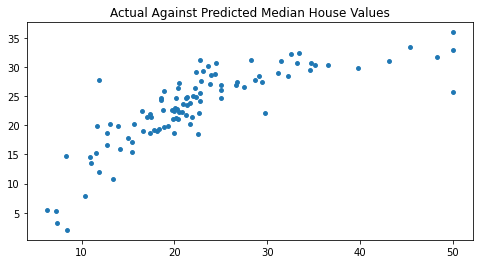

In [84]:
# Plot the test values and predicted y values based on the PCA transformed data
plt.figure(figsize = (8,4))
plt.scatter(y_test.values, y_pred, s = 15)
plt.title("Actual Against Predicted Median House Values")
plt.show()

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Median Home Value   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     81.80
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           5.60e-73
Time:                        14:31:59   Log-Likelihood:                -1287.3
No. Observations:                 404   AIC:                             2591.
Df Residuals:                     396   BIC:                             2623.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             22.6736      0.295     76.970      0.000      22.094      23.253
1             -0.0257      0.002    -14.911      0.000      -0.029      -0.022
2              0.0680      0.010      6.615      0.000       0.048       0.088
3              0.0331      0.018      1.852      0.065      -0.002       0.068
4             -0.2828      0.038     -7.433      0.000      -0.358      -0.208
5             -0.8333      0.055    -15.191      0.000      -0.941      -0.725
6              0.2701      0.073      3.719      0.000       0.127       0.413
7             -0.2837      0.099     -2.879      0.004      -0.477      -0.090
==============================================================================
Omnibus:                      110.109   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.178
Skew:                           1.439   Prob(JB):                     1.04e-50
Kurtosis:                       5.321   Cond. No.                         172.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Scikit Learn ML Model

In [86]:
model_params['sklearn_reg'] = build_model(linear_reg,'Median Home Value',X,boston_df,6)

In [87]:
model       = model_params['sklearn_reg']['model']
x_transform = model_params['sklearn_reg']['x_transform']
x_train     = model_params['sklearn_reg']['x_train']
x_test      = model_params['sklearn_reg']['x_test']
y_train     = model_params['sklearn_reg']['y_train']
y_test      = model_params['sklearn_reg']['y_test']
y_pred      = model_params['sklearn_reg']['y_pred']

In [88]:
x_transform.shape

(506, 6)

In [89]:
print('Training score: ', model.score(x_train, y_train))
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.5814364039144084
Testing score:  0.5909558297564835


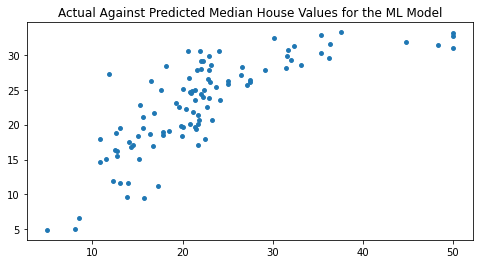

In [90]:
plt.figure(figsize = (8,4))
plt.scatter(y_test.values, y_pred, s = 15)
plt.title("Actual Against Predicted Median House Values for the ML Model")
plt.show()

Comment - the r2 score has dropped quite a bit from reducing the number of principal components by 1

# Singular Value Decomposition

In [91]:
cancer_df = pd.read_csv('datasets/cancer.csv')
cancer_df.shape

(569, 31)

In [92]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [93]:
X = list(cancer_df.columns[:-1])

In [94]:
# Function to build a model with input of the X and y variables and the hyperparameters as before. The factor analysis references
## to a function and the model is trained using a logistic regression

def build_model(name_of_y_col, 
                names_of_x_cols, 
                dataset,
                *hyperparameters):
    
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]

    fa_obj, X = factor_analysis(X, Y, *hyperparameters)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    
    model = logistic_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    pred_results = pd.DataFrame({'y_test' : y_test,
                                 'y_pred' : y_pred})

    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
  

    return {'fact_a_obj' : fa_obj,
            'transform_x' : X,
            'accuracy': acc, 
            'precision' : prec,
            'recall' : recall,
            'confusion_matrix' : model_crosstab }    

In [95]:
# Function to run factor analysis for 10000 iterations and number of components as specified by the input to the function
def factor_analysis(x, y, n):
    fact_a = FactorAnalysis(n_components = n, random_state = 10, max_iter=10000)
    x_new = fact_a.fit_transform(x, y)
    return fact_a, pd.DataFrame(x_new)

In [96]:
# Function to run a Logistic Regression model on the data after SVD
def logistic_fn(x_train, y_train):
    model = LogisticRegression(solver = 'liblinear', max_iter=10000)
    model.fit(x_train, y_train)
    
    return model

In [97]:
# Run results and feed into a result dictionary
result_dict = {}
for i in range (1, 31):
    result_dict['n_components - ' + str(i)] = build_model('class',X,cancer_df,i)

In [98]:
# Function to print the results
def compare_results(result_dict):
    for key in result_dict:
        print('Test: ', key)

        print()
        print("accuracy_score : ", result_dict[key]['accuracy'])
        print("precision_score : ", result_dict[key]['precision'])
        print("recall_score : ", result_dict[key]['recall'])
       
        print()

In [99]:
# Function to visualise the results
def visualize_results(result_dict):
    
    n_components = list(range(0, 30))
    acc = [result_dict[key]['accuracy'] for key in result_dict]
    precision = [result_dict[key]['precision'] for key in result_dict]
    recall = [result_dict[key]['recall'] for key in result_dict]

    plt.figure(figsize = (8,4))
    plt.plot(n_components, acc, label='Accuracy')
    plt.plot(n_components, precision, label='Precision')
    plt.plot(n_components, recall, label='Recall')

    plt.ylim([0.7, 1.2])

    plt.xlabel('n components')
    plt.ylabel('score');
    
    plt.legend()

In [100]:
compare_results(result_dict)

Test:  n_components - 1

accuracy_score :  0.8771929824561403
precision_score :  0.8507462686567164
recall_score :  0.9344262295081968

Test:  n_components - 2

accuracy_score :  0.868421052631579
precision_score :  0.8734177215189873
recall_score :  0.9324324324324325

Test:  n_components - 3

accuracy_score :  0.9210526315789473
precision_score :  0.9333333333333333
recall_score :  0.9459459459459459

Test:  n_components - 4

accuracy_score :  0.9473684210526315
precision_score :  0.9402985074626866
recall_score :  0.9692307692307692

Test:  n_components - 5

accuracy_score :  0.9649122807017544
precision_score :  0.9682539682539683
recall_score :  0.9682539682539683

Test:  n_components - 6

accuracy_score :  0.9649122807017544
precision_score :  0.9701492537313433
recall_score :  0.9701492537313433

Test:  n_components - 7

accuracy_score :  0.956140350877193
precision_score :  0.9397590361445783
recall_score :  1.0

Test:  n_components - 8

accuracy_score :  0.9824561403508771
pre

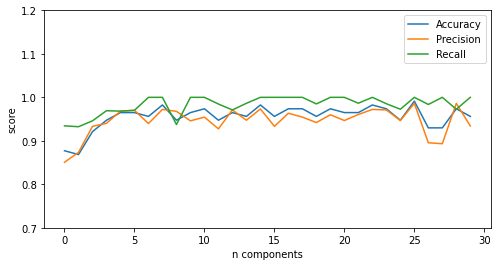

In [101]:
visualize_results(result_dict)

Perfect recall at 21 components

# Linear Discriminant Analysis (LDA)

In [102]:
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(data = iris.data, columns = iris.feature_names)
y = iris.target
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [103]:
target_names = iris.target_names

In [104]:
X.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

Text(0, 0.5, 'sepal width (cm)')

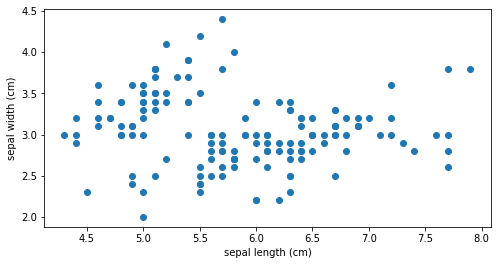

In [105]:
# Plot sepal lengths against widths
fig, ax = plt.subplots(figsize=(8,4))
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

Text(0, 0.5, 'iris type')

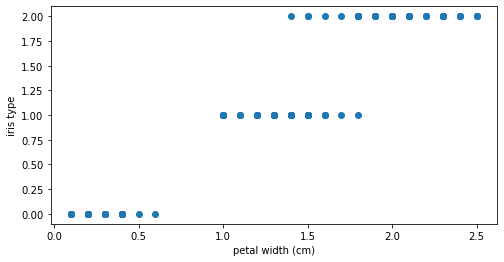

In [106]:
# Plot petal widths against iris type
fig, ax = plt.subplots(figsize = (8,4))
plt.scatter(X['petal width (cm)'], pd.DataFrame(data = y))
plt.xlabel('petal width (cm)')
plt.ylabel('iris type')

Text(0, 0.5, 'iris type')

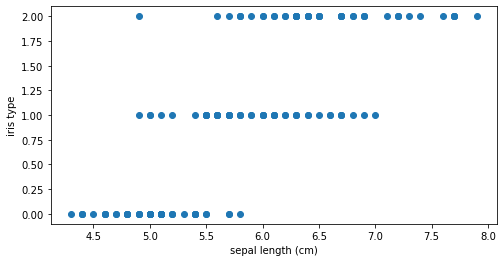

In [107]:
# Plot sepal length against the iris type
fig, ax = plt.subplots(figsize = (8,4))
plt.scatter(X['sepal length (cm)'], pd.DataFrame(data = y))
plt.xlabel('sepal length (cm)')
plt.ylabel('iris type')

In [108]:
# Correlation between features
iris_corr = X.corr()
iris_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


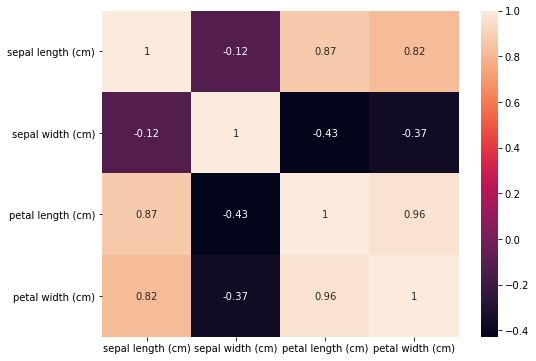

In [109]:
# Heatmap of the correlations
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(iris_corr, annot = True)

High corrrelations between most of the features

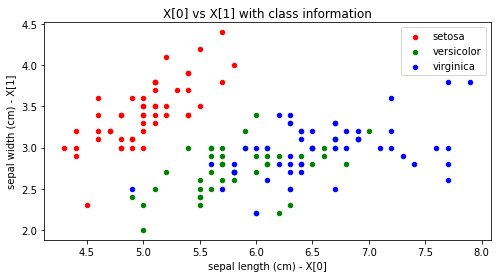

In [110]:
# Plot the iris classes
fig, ax = plt.subplots(figsize=(8,4))
x = np.array(X)
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(x[y == i, 0], x[y == i, 1], c = c, s=20, label = target_name)

plt.title('X[0] vs X[1] with class information')
plt.xlabel('sepal length (cm) - X[0]')
plt.ylabel('sepal width (cm) - X[1]')

plt.legend()
plt.show()

In [111]:
# Transform using LDA and get the ratios - most of the variance is explained by the first component
lda = LDA(n_components = 2)
X_new = lda.fit_transform(X, y)
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

In [112]:
X_new.shape

(150, 2)

In [113]:
X_new = pd.DataFrame(X_new)
X_new.head()

,0,1
0,8.061800,0.300421
1,7.128688,-0.786660
2,7.489828,-0.265384
3,6.813201,-0.670631
4,8.132309,0.514463


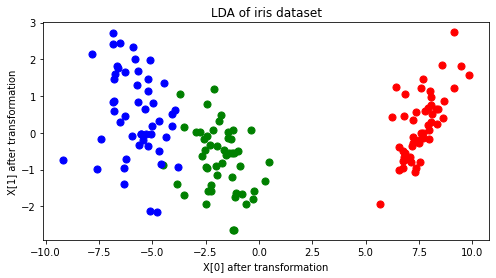

In [114]:
# Plot the newly transformed data
fig, ax = plt.subplots(figsize = (8,4))

x_new = np.array(X_new)

for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter( x_new[y == i, 0], x_new[y == i, 1], c = c, s=50, label = target_name)
    

plt.title('LDA of iris dataset')
plt.xlabel('X[0] after transformation')
plt.ylabel('X[1] after transformation');
plt.show()

In [115]:
# Get correlations between the two features
lda_corr = X_new.corr()
lda_corr

,0,1
0,1.000000e+00,-1.241602e-15
1,-1.241602e-15,1.000000e+00


In [116]:
# Fit a logistic regression model using the original data. Multi-class set to auto as there are three classes
model = LogisticRegression(solver = 'liblinear', multi_class='auto')
model.fit(X, y)
model.score(x, y)

0.96

In [117]:
# Fit a logistic regression model using the transformed data based on two features
model = LogisticRegression(solver = 'liblinear', multi_class='auto')
model.fit(X_new, y)
model.score(X_new, y)

0.9333333333333333

# Non Linear Dimensionality Reduction

In [126]:
# Create the data
def generate_s_curve(method, n = 1500):
    
    X, color = method( n_samples = n)
    
    print ("Shape of X : ", X.shape)
    print ("Shape of color : ", color.shape)
    print()
    print ("Sample X : \n")
    
    X = pd.DataFrame(X)
    print(X.sample(10))
    
    ax = plt.subplots(figsize=(12, 8))
    ax = plt.axes(projection ='3d')
    
    ax.scatter3D(X[0], X[1], X[2], c = color, cmap = plt.cm.RdYlBu, s=100);
    
    return X, color

Shape of X :  (1500, 3)
Shape of color :  (1500,)

Sample X : 

             0         1         2
843   0.366291  0.966561  1.930500
690  -0.780949  1.977696  1.624595
1393  0.162811  1.830913 -0.013343
1271  0.910366  1.137855  1.413803
127   0.923424  1.264629 -1.383782
132   0.823927  1.537644 -0.433304
45    0.274504  1.712508 -1.961586
1162  0.958184  0.175997 -0.713846
180   0.994249  1.271095 -0.892907
494   0.421553  0.479074 -1.906804


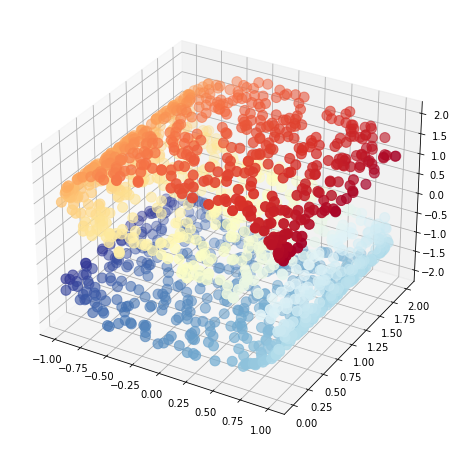

In [133]:
X, color = generate_s_curve(datasets.make_s_curve)

## Manifold Learning

In [137]:
# Function to apply the manifold technique and plot the transformed data in two dimensions
def apply_manifold_learning(X, method):
    
    X = method.fit_transform(X)
    
    print ("New shape of X : ", X.shape)
    print()
    print ("Sample X : \n")
    
    X = pd.DataFrame(X)
    print(X.sample(10))
    
    plt.subplots(figsize = (8,4))
    plt.axis('equal');

    plt.scatter(X[0], X[1], c = color, cmap = plt.cm.RdYlBu)
    plt.xlabel('X[0]')
    plt.ylabel('X[1]');
    
    return method

New shape of X :  (1500, 2)

Sample X : 

             0         1
12   -0.166807  0.435066
870   0.103812  0.404758
360  -0.308489 -0.315105
14    0.345535  0.032267
1294  0.419123  0.197259
555   0.466796  0.307029
1039 -0.570355 -0.332679
741   0.299956  0.382987
334   0.115388 -0.428866
1125  0.001889 -0.017397


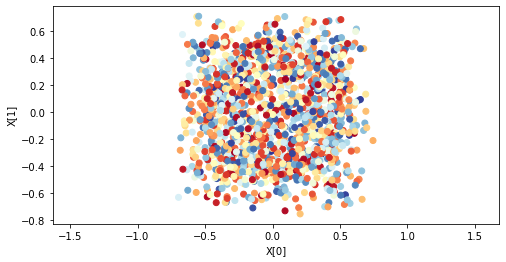

In [138]:
# Multi-dimensional scaling (preserve the distance between instances). Set metric to False which is non-parametric which uses
## isotonic regression which sets a curve on the data. Used when distance not important but ranking is
mds = apply_manifold_learning(X, MDS(n_components = 2, metric = False))

New shape of X :  (1500, 2)

Sample X : 

             0         1
458  -0.200095  1.945546
106  -0.224052 -0.044769
161   0.796940 -1.704657
567   1.221794 -1.682051
967  -0.639349 -1.733011
906  -0.791581  0.382035
1377  0.651499 -2.198282
660   0.895296  1.057210
417  -0.142815 -2.197545
252  -0.841302 -1.375113


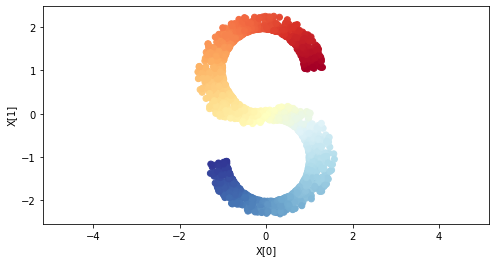

In [139]:
# Change the metric to True which is similar to MSE regression. Used when coordinates have meaningful values in terms of distances
ds = apply_manifold_learning(X, MDS(n_components = 2, metric = True))

## Spectral Embedding

New shape of X :  (1500, 2)

Sample X : 

             0         1
808  -0.000946  0.002646
277   0.002826 -0.002258
1153  0.002936 -0.002699
1091 -0.002442 -0.001168
1158  0.002661 -0.001633
1448  0.000384  0.002851
570  -0.002063  0.000131
741   0.002756 -0.002003
697  -0.000970  0.002605
1143 -0.001270  0.002061


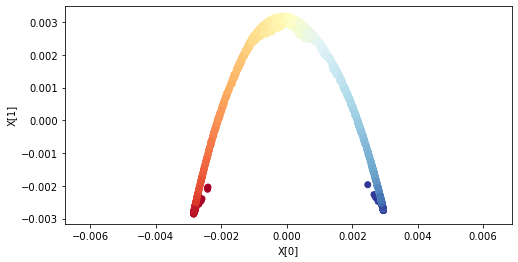

In [141]:
spectral_em = apply_manifold_learning(X, \
        SpectralEmbedding(n_components = 2, random_state = 0, eigen_solver = "arpack"))

## TSNE

New shape of X :  (1500, 2)

Sample X : 

              0          1
807  -50.287895   3.269939
1245 -20.912773  -7.642411
506  -68.096344  -0.556726
1351  65.121147  -1.792265
452   -8.624870 -10.595383
1027  33.182690 -11.660466
613  -71.637314  -8.308587
859   44.237995  -9.197866
735  -19.870413   6.654082
509  -45.906265  12.068380


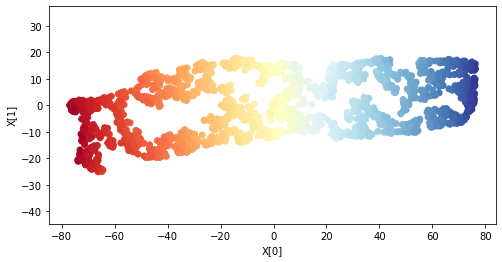

In [143]:
# Usually used for visualisation which keeps similar instances together and dissimilar ones apart
tsne = apply_manifold_learning(X, TSNE(n_components = 2, init = 'pca', random_state = 0))

## ISOMAP

New shape of X :  (1500, 2)

Sample X : 

             0         1
108  -2.457507  0.592885
1217  0.464240 -0.349289
60   -3.988951  0.185531
862  -0.710629 -0.332876
1270 -0.801141  0.927429
1488 -2.824540  1.002945
534  -1.963593 -0.622233
595   2.002209  0.097538
486   4.592093  0.968236
751   2.905320  0.091396


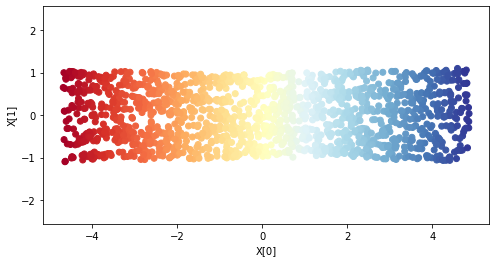

In [145]:
isomap = apply_manifold_learning(X, Isomap(n_neighbors = 15, n_components = 2))

## LLE

New shape of X :  (1500, 2)

Sample X : 

             0         1
801  -0.041446  0.035290
873  -0.024735  0.006877
757   0.005132 -0.024768
782   0.003863 -0.027264
1376 -0.017101 -0.019616
125   0.029156  0.013150
1446  0.016539 -0.012520
858   0.006283 -0.033239
851   0.015231 -0.020055
1112  0.001084 -0.024941


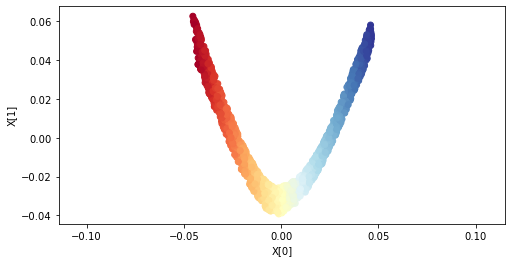

In [147]:
# method standard doesn't scale to large datasets
lle = apply_manifold_learning(X, \
        LocallyLinearEmbedding(n_neighbors = 15, n_components = 2, method = 'standard') ) 

## HLE

New shape of X :  (1500, 2)

Sample X : 

             0         1
274   0.002134  0.041608
79   -0.028971 -0.029684
341   0.017956 -0.037715
447   0.005949  0.002970
1446  0.016683  0.030088
263  -0.043968 -0.006645
390  -0.041477  0.032480
157   0.042232  0.015832
812  -0.042656 -0.036386
371   0.021907 -0.025026


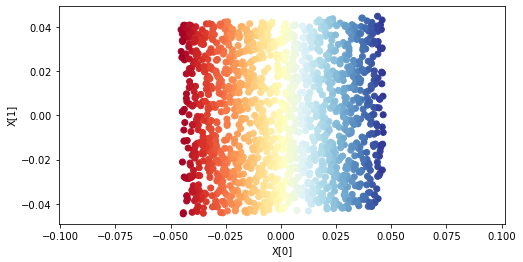

In [148]:
# Set method to hessian - can give better results but complexity is higher
hlle = apply_manifold_learning(X, 
            LocallyLinearEmbedding(n_neighbors = 15, n_components = 2, method = 'hessian'))

New shape of X :  (1500, 2)

Sample X : 

             0         1
1199 -0.024752  0.027474
622  -0.022490 -0.015590
338  -0.000607  0.000048
1280 -0.034916  0.012225
1181  0.021999 -0.042934
1407  0.006036 -0.006244
638   0.017643  0.031844
69    0.043800  0.033230
1367 -0.023714 -0.019523
756  -0.019136 -0.003998


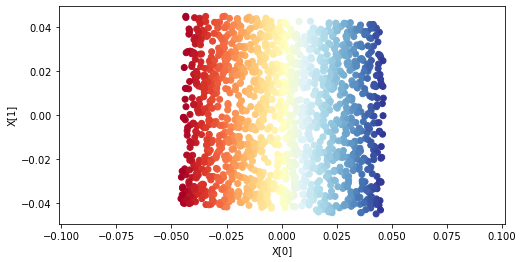

In [149]:
hllem = apply_manifold_learning(X, 
            LocallyLinearEmbedding(n_neighbors = 15, n_components = 2, method = 'modified'))

# Handwritten Digits Example

In [150]:
from sklearn.datasets import load_digits
digits = load_digits()

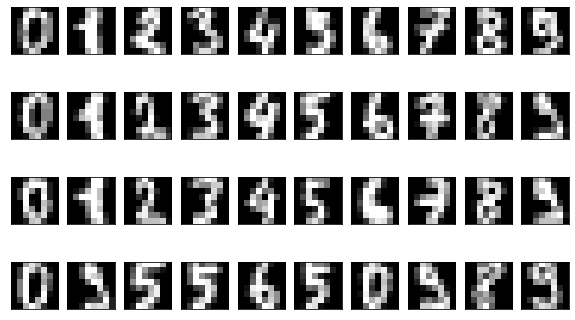

In [152]:
fig, ax = plt.subplots(4, 10, figsize = (10,6), subplot_kw = dict(xticks = [], yticks = []))

for i, axi in enumerate(ax.flat):
    axi.imshow( digits.images[i], cmap = 'gray')

In [153]:
X = digits.data
y = digits.target
X.shape

(1797, 64)

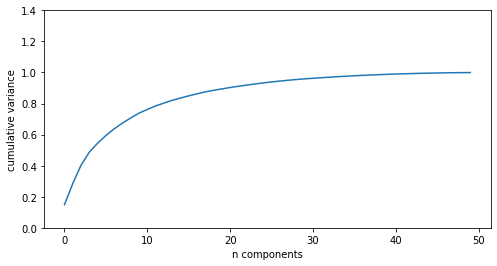

In [155]:
# Apply PCA
model = PCA(50).fit(X)
plt.figure( figsize = (8,4))
plt.plot(np.cumsum(model.explained_variance_ratio_ ))

plt.ylim([0, 1.4])

plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [175]:
# Function to view the output of each dimensionality reduction method
classes = list(range(10))
target_names = digits.target_names

def apply_manifold_learning(X, y, method):
    
    X = method.fit_transform(X)
    
    print ("New shape of X : ", X.shape)
    print()
    print ("Sample X : \n")
    print (pd.DataFrame(X).sample(10))
    print()
    
    fig, ax = plt.subplots(figsize = (8,4))
    for i, target_name in zip(classes, target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], 
                    label = target_name, 
                    cmap = plt.cm.Spectral, s=10)

    plt.xlabel('Component 1')
    plt.ylabel('Component 2');

    plt.legend()
    plt.show()
    
    return method

New shape of X :  (1797, 2)

Sample X : 

             0         1
1556  0.623823  0.228417
1192 -0.021896  0.591372
971  -0.072276  0.532177
830  -0.366492 -0.451031
445   0.337619  0.171363
564  -0.484509  0.122238
992  -0.440389  0.273366
742   0.304521  0.467856
1730  0.498513 -0.548223
843   0.120955  0.396736



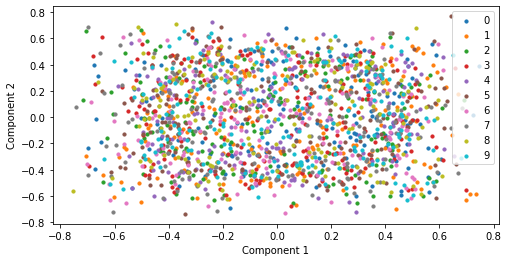

In [176]:
mds = apply_manifold_learning(X, y, 
      MDS(n_components = 2, metric = False, n_init = 1, max_iter = 100))

New shape of X :  (1797, 2)

Sample X : 

              0          1
104  -26.171530  -6.795338
237  -15.220550 -30.057283
1759  13.656850  27.169552
384   -5.027296  -7.919142
1174  18.123496 -32.157295
1213   0.848747 -39.615564
1543  16.664290  24.519706
1485  10.960882  44.219638
746  -14.102527 -21.531735
115   14.718242 -11.863548



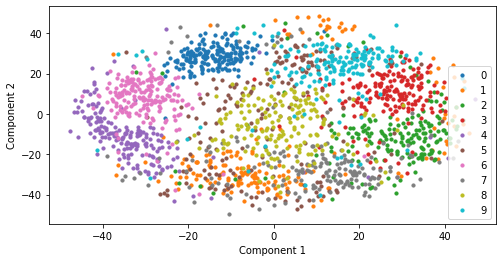

In [177]:
mds = apply_manifold_learning(X, y, 
      MDS(n_components = 2, metric = True, n_init = 1, max_iter = 100))

New shape of X :  (1797, 2)

Sample X : 

              0          1
904   30.135600 -47.759388
1662 -50.319430   3.029912
1010  31.179834 -34.332812
1486  21.529429  -8.958436
109   -6.901722  10.332953
555   27.880958 -46.385179
668  -36.889302 -32.866203
1331 -63.012675 -13.727574
371  -48.425132 -43.051870
1564 -26.081613  32.167340



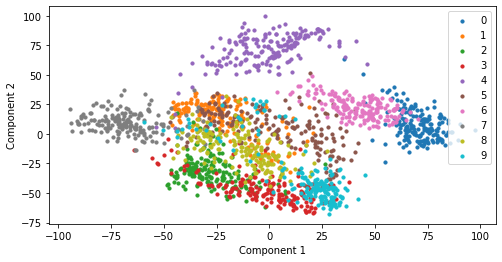

In [178]:
isomap = apply_manifold_learning(X, y, Isomap(n_neighbors = 30, n_components = 2))

New shape of X :  (1797, 2)

Sample X : 

             0         1
441  -0.005683  0.015839
811  -0.051897  0.002505
977   0.013229  0.015996
306   0.015896 -0.002677
1417  0.004132 -0.000803
501   0.001521  0.002373
648  -0.008469 -0.010484
493  -0.009939 -0.003250
1528  0.003784  0.016543
623   0.020753 -0.037761



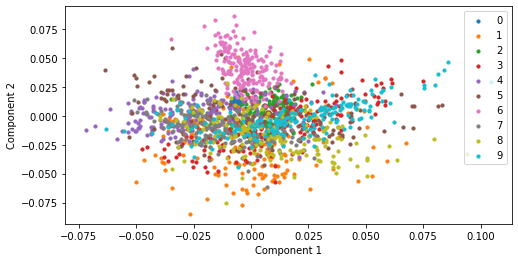

In [179]:
lle = apply_manifold_learning(X, y, \
    LocallyLinearEmbedding(n_neighbors = 30, n_components = 2, method = 'standard'))

New shape of X :  (1797, 2)

Sample X : 

             0         1
1560 -0.011542  0.006497
797  -0.011165  0.004158
427  -0.004902  0.007875
952  -0.012132  0.000654
571   0.070174  0.004556
107  -0.007760  0.009645
1001 -0.005313  0.007297
160   0.072412  0.004202
1347 -0.004810  0.009890
75   -0.011091  0.008551



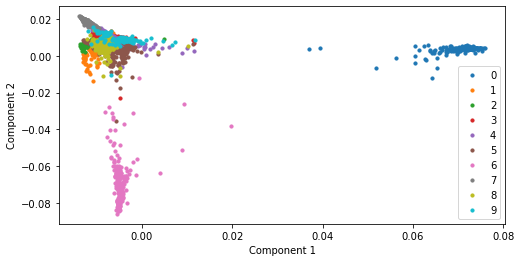

In [180]:
lle = apply_manifold_learning(X, y, \
    LocallyLinearEmbedding(n_neighbors = 30, n_components = 2, method = 'modified'))

New shape of X :  (1797, 2)

Sample X : 

             0         1
1136  0.005511 -0.003951
527   0.011620 -0.003156
572   0.011699 -0.008678
827   0.012742  0.003993
981  -0.073598  0.003592
1285  0.002912  0.010150
1169  0.011380  0.010372
1408  0.005245 -0.002122
1368  0.012352  0.020889
740   0.010484  0.016159



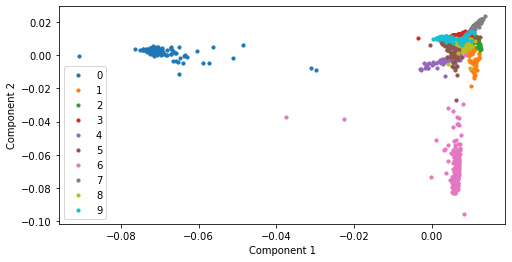

In [181]:
hlle = apply_manifold_learning(X, y, \
    LocallyLinearEmbedding(n_neighbors = 30, n_components = 2, method = 'hessian'))

New shape of X :  (1797, 2)

Sample X : 

             0         1
1113 -0.001615  0.000973
395  -0.000380 -0.002486
38   -0.001436  0.000703
1495 -0.000411 -0.001189
731  -0.001430  0.001063
614  -0.000970 -0.002223
510  -0.000220  0.002051
572   0.000225  0.001360
305   0.004188 -0.001770
1381 -0.001566  0.001307



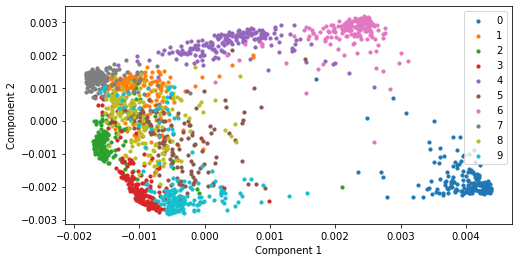

In [182]:
spectral_em = apply_manifold_learning(X, y, \
    SpectralEmbedding(n_components = 2, random_state = 0, eigen_solver = "arpack"))

New shape of X :  (1797, 2)

Sample X : 

              0          1
1207 -39.597866 -31.192888
1026   4.409509  -1.672068
1042 -47.844406  15.114059
1411  63.314533   2.769165
736   18.844736 -24.448265
1174   3.920180 -54.329781
328   -0.453349  55.681767
409  -43.475723  18.493961
556   13.300545  -6.829294
1764  61.699566   3.171082



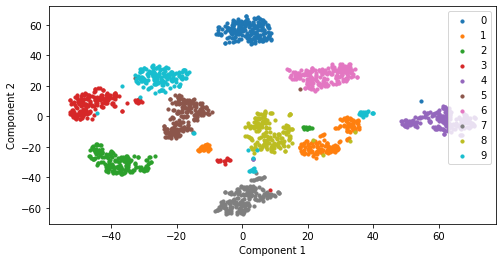

In [183]:
tsne = apply_manifold_learning(X, y, TSNE(n_components = 2, init = 'pca', random_state = 0))

# Olivetti Faces Data

All code from Pluralsight - Janini Raavi

In [185]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\imoge\scikit_learn_data


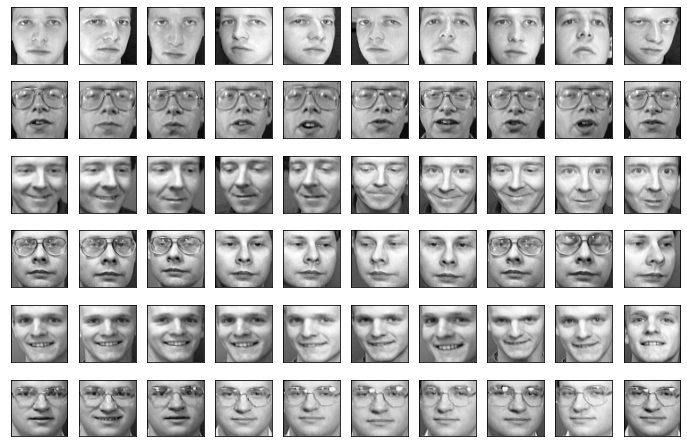

In [186]:
fig, ax = plt.subplots(6, 10, figsize=(12, 8), subplot_kw=dict(xticks = [], yticks = []))

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'gray')

In [187]:
X = faces.data
y = faces.target
X.shape

(400, 4096)

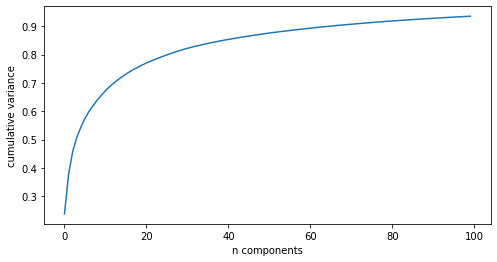

In [190]:
model = PCA(100).fit(X)
plt.figure(figsize = (8,4))
plt.plot(np.cumsum(model.explained_variance_ratio_))

plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [192]:
def plot_components(data, X_new, images = None, ax = None, thumb_frac = 0.05, cmap = 'gray'):
    
    ax = ax or plt.gca()
    ax.plot(X_new[:, 0], X_new[:, 1], '.k')
    
    if images is not None:
        
        min_dist = (thumb_frac * max( X_new.max(0) - X_new.min(0) )) ** 2
        shown_images = np.array( [2 * X_new.max(0)] )
        
        for i in range(data.shape[0]):
            
            dist = np.sum((X_new[i] - shown_images) ** 2, 1)
            
            if np.min(dist) < min_dist:
                continue                            # don't show points that are too close
                
            shown_images = np.vstack([shown_images, X_new[i]])
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap = cmap), X_new[i])
            
            ax.add_artist(imagebox)

In [200]:
def apply_manifold_learning(X, method, show_scatter_plot = False):
    
    X_new = method.fit_transform(X)
    
    print ("New shape of X : ", X_new.shape)
    print()
    print ("Sample X : \n")
    print (pd.DataFrame(X_new).sample(10))
    print()

    if show_scatter_plot is not False:
        
        fig, ax = plt.subplots(figsize = (12,8))
        ax.scatter(X_new[:, 0], X_new[:, 1], cmap = 'Spectral')
        plt.xlabel('X[0] after transformation')
        plt.ylabel('X[1] after transformation');
    
    fig, ax = plt.subplots(figsize = (12, 8))
    plot_components(X[:20,:], X_new[:20,:], images = faces.images[:, ::2, ::2])
    plt.xlabel('Component 1')
    plt.ylabel('Component 2');
    
    return method

New shape of X :  (400, 2)

Sample X : 

            0          1
265  3.924496  -3.392069
393  0.567461  -4.677952
10  -4.924881   3.839782
176 -8.146621  -1.577619
228 -5.396240  -7.549990
195  1.030722   4.814893
256 -6.047585  -2.724953
78  -6.616679 -13.026314
230 -3.717014   3.560032
14  -2.632359  -5.579056



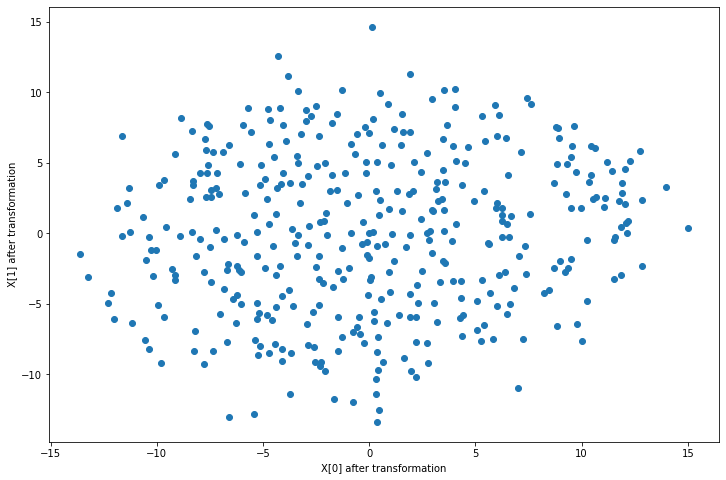

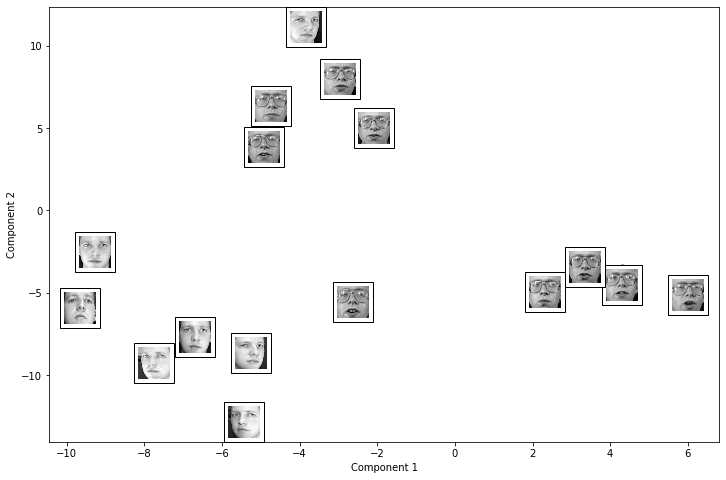

In [201]:
mds = apply_manifold_learning(X, 
        MDS(n_components = 2, metric = True, n_init = 1, max_iter = 100), \
        show_scatter_plot = True )

New shape of X :  (400, 2)

Sample X : 

             0          1
64  -12.990565   8.988649
2   -12.627040   5.823792
232   8.999018  13.602252
212  26.915464  -2.033850
342   9.016159   3.822915
112   8.056410   3.382640
32    1.443445  -0.980092
206   9.000093   9.836053
100 -18.895062  -5.535808
30   -2.853145   0.171456



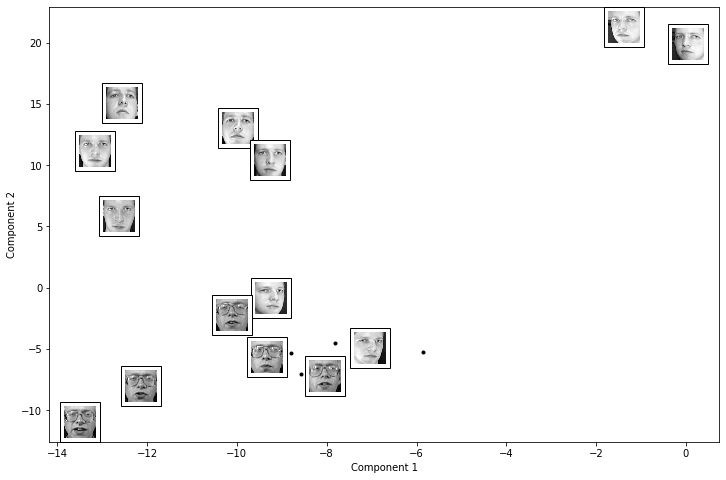

In [202]:
isomap = apply_manifold_learning(X, Isomap(n_neighbors = 10, n_components = 2))

New shape of X :  (400, 2)

Sample X : 

            0         1
54   0.024668  0.029015
58   0.022789  0.027881
241  0.022164  0.019780
100  0.039295 -0.221765
112  0.013258  0.026980
1    0.020694  0.008448
216 -0.177165 -0.032899
233 -0.010482  0.017244
193 -0.002025  0.026103
6    0.021334  0.021682



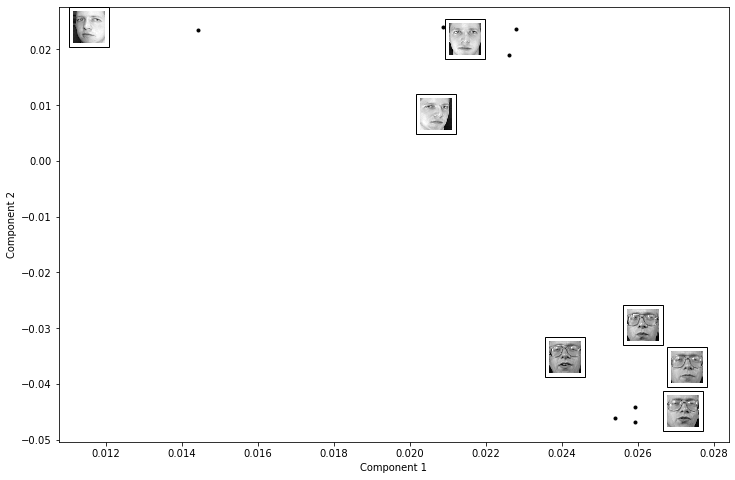

In [203]:
lle = apply_manifold_learning(X, \
    LocallyLinearEmbedding(n_neighbors = 10, n_components = 2, method = 'standard'))

New shape of X :  (400, 2)

Sample X : 

            0         1
161 -0.005516 -0.017769
301  0.435094  0.001819
358 -0.005286 -0.017667
243 -0.004407 -0.014651
334 -0.002577  0.297269
374 -0.005543 -0.013736
13  -0.000258 -0.023432
95  -0.005544 -0.016369
247 -0.006144 -0.014551
28  -0.006031 -0.016363



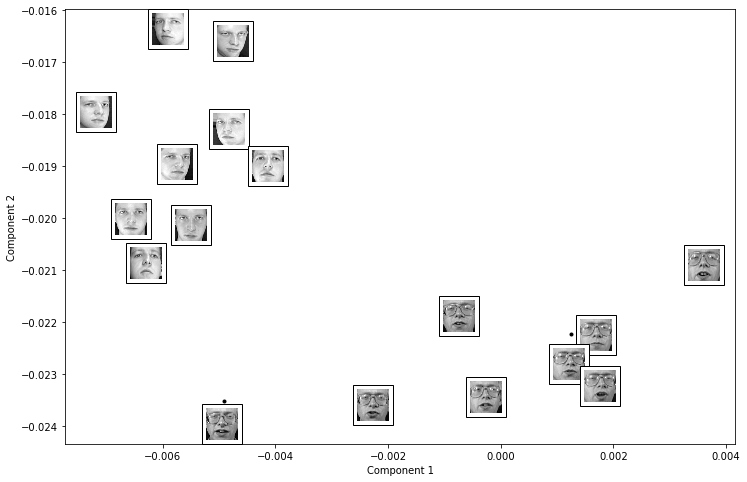

In [204]:
hlle = apply_manifold_learning(X, \
    LocallyLinearEmbedding(n_neighbors = 10, n_components = 2, method = 'hessian'))

New shape of X :  (400, 2)

Sample X : 

            0         1
192  0.003694 -0.003949
141 -0.003470  0.001659
126 -0.002989  0.017668
346 -0.000451 -0.006981
148 -0.001870 -0.001211
398 -0.004598  0.020536
116 -0.000264 -0.005015
224 -0.001905 -0.007569
194 -0.004520  0.006885
123 -0.003331  0.013146



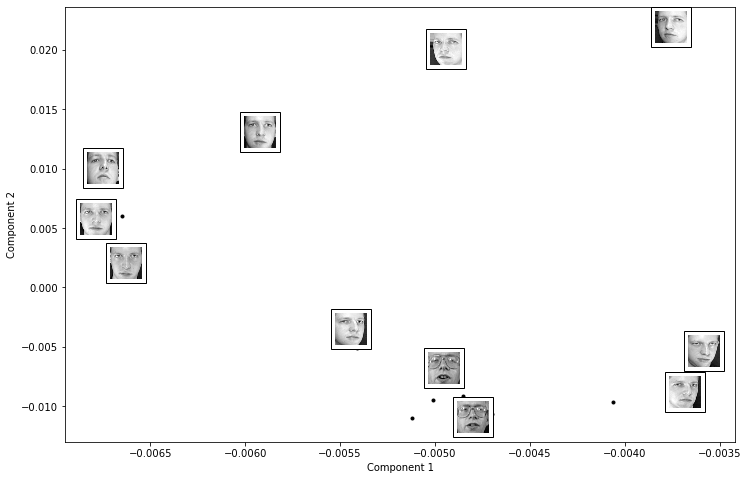

In [205]:
spectral_em = apply_manifold_learning(X, \
    SpectralEmbedding(n_components = 2, random_state = 0, eigen_solver = "arpack"))

New shape of X :  (400, 2)

Sample X : 

             0          1
387  20.695311  24.030396
203   8.593841  11.576062
275 -14.372603 -27.494175
115  -4.706616 -12.247319
228  -4.403714  -9.416084
168   3.602794 -22.943579
392  -4.582865 -14.905252
171 -10.715904 -10.368200
321  11.317650  26.872471
281  17.187273  22.930222



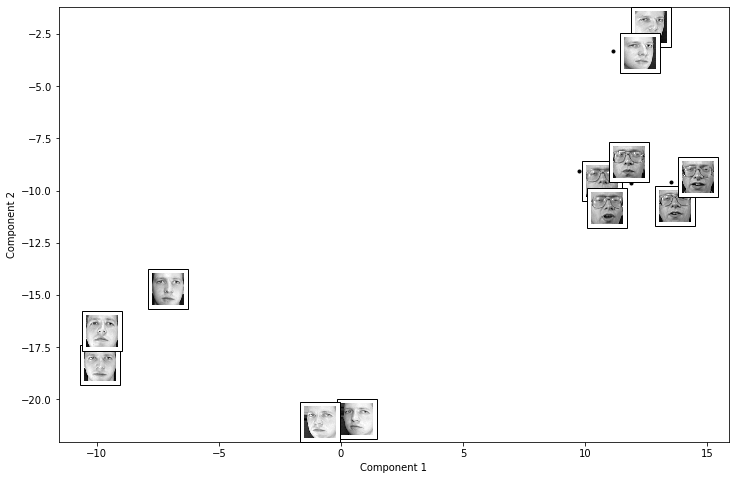

In [206]:
tsne = apply_manifold_learning(X, TSNE(n_components = 2, init = 'pca', random_state = 0))